In [5]:
#IMPORTAMOS LAS LIBRERIAS NECESARIAS
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Importar Keras y librerías adicionales
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.base import clone
#AGREGO DECICSON TREE 
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [6]:
#DESCARGAMOS EL DATASET

data_link = 'https://raw.githubusercontent.com/niwdehu/ProyectoFinal_INF648/main/DataSets/Dataset_with_SMOTENC.csv'
#data_link = 'https://raw.githubusercontent.com/rebaza98/proyectoML2022/main/ObesityDataSet_raw_and_data_sinthetic.csv'

dataset_completo = pd.read_csv(data_link)
print('El dataset tiene la forma {}.'.format(dataset_completo.shape))
dataset_completo

El dataset tiene la forma (2485, 17).


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2480,Male,22.123480,1.650000,80.000000,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,2.0,no,Walking,Overweight_Level_II
2481,Male,33.301758,1.710947,83.301758,yes,yes,2.0,3.0,Frequently,no,2.0,no,3.0,0.0,Sometimes,Automobile,Overweight_Level_II
2482,Female,27.489696,1.654691,78.000000,yes,yes,3.0,3.0,Sometimes,no,3.0,no,2.0,1.0,Frequently,Automobile,Overweight_Level_II
2483,Male,27.602157,1.921971,101.698921,yes,yes,2.0,1.0,Sometimes,no,1.0,no,1.0,0.0,Sometimes,Walking,Overweight_Level_II


Dividiremos el dataset en 2 parte, "dataset_encuesta" contendra los datos originales de la encuesta web mientras que dataset_sintetico tendra los datos generados con SMOTENC

In [7]:
dataset_encuesta = dataset_completo.head(498)
print(dataset_encuesta.shape)
dataset_encuesta

(498, 17)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,Male,20.0,1.80,65.0,no,yes,2.0,3.0,Frequently,no,1.0,no,2.0,0.0,Sometimes,Motorbike,Normal_Weight
494,Female,18.0,1.67,66.0,no,yes,3.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Normal_Weight
495,Male,19.0,1.80,60.0,yes,yes,3.0,1.0,Always,no,1.0,yes,0.0,0.0,no,Motorbike,Normal_Weight
496,Male,18.0,1.72,53.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight


In [8]:
tail = len(dataset_completo) - 498
dataset_sintetico = dataset_completo.tail(tail)
print(dataset_sintetico.shape)
dataset_sintetico

(1987, 17)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
498,Male,18.000000,1.840094,60.000000,yes,yes,3.0,4.0,Sometimes,no,2.0,no,2.0,1.0,Sometimes,Public_Transportation,Insufficient_Weight
499,Male,31.689185,1.625631,47.563062,yes,yes,2.0,3.0,no,no,2.0,no,0.0,0.0,no,Public_Transportation,Insufficient_Weight
500,Male,18.000000,1.843254,60.000000,yes,yes,2.0,4.0,Sometimes,no,2.0,yes,2.0,0.0,no,Automobile,Insufficient_Weight
501,Male,16.804397,1.690110,51.206596,yes,yes,2.0,3.0,Sometimes,no,2.0,no,2.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight
502,Male,17.069158,1.794149,57.207473,yes,yes,3.0,4.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Automobile,Insufficient_Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2480,Male,22.123480,1.650000,80.000000,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,2.0,no,Walking,Overweight_Level_II
2481,Male,33.301758,1.710947,83.301758,yes,yes,2.0,3.0,Frequently,no,2.0,no,3.0,0.0,Sometimes,Automobile,Overweight_Level_II
2482,Female,27.489696,1.654691,78.000000,yes,yes,3.0,3.0,Sometimes,no,3.0,no,2.0,1.0,Frequently,Automobile,Overweight_Level_II
2483,Male,27.602157,1.921971,101.698921,yes,yes,2.0,1.0,Sometimes,no,1.0,no,1.0,0.0,Sometimes,Walking,Overweight_Level_II


In [53]:
#Metodo que retorna el dataset convertido QUITANDO LAS COLUMNAS HEIGHT Y WEIGHT ADAPTADO DE EJERCICIO TITANIC DEL CURSO
#SI EL PARAMETRO solo_habito es seteado en True, entonces se eliminaran las columnas GENDER AGE Y FAMILI_HISTORY para solo realizar el analisis 
#Con las caracteristicas de habito alimenticio
def fillColumnaCategorica(dataset, solo_habito):
  datacopy = dataset.copy()

  #REMOVER COLUMNA DURACION HEIGHT and WEIGHT
  
  datacopy = datacopy.drop("Height", axis=1)
  datacopy = datacopy.drop("Weight", axis=1)
  if solo_habito:
    datacopy = datacopy.drop("Gender", axis=1)
    datacopy = datacopy.drop("Age", axis=1)
    datacopy = datacopy.drop("family_history_with_overweight", axis=1)
  
  
  #Determinamos que variables son del tipo númerico y cuales son categóricas
  numeric_columns = list()
  categorical_columns = list()
  dictionary_of_columns_with_index_to_categorical = dict()
  dictionary_of_columns_with_categorical_to_index = dict()

  for column in datacopy:
    #Determinamos si la variable es numérica o no
    if pd.api.types.is_numeric_dtype(datacopy[column]):
      numeric_columns.append(column)
    else:
      #Modificamos el tipo de dato de la variable mediante "astype"
      datacopy[column] = datacopy[column].astype("category")

      #Verificamos si el tipo de dato de la variable fue transformado a categórico correctamente
      if not pd.api.types.is_categorical_dtype(datacopy[column]):
        raise Exception("La columna {} no se transformó correctamente a categórica".format(column))

      dictionary_of_columns_with_index_to_categorical[column] = dict()
      dictionary_of_columns_with_categorical_to_index[column] = dict()
      
      #Indexamos los valores (categorías), sin tomar en consideración los nulos, de la variable y guardamos esa información en los diccionarios
      for index, category in enumerate(datacopy[column].cat.categories):
        dictionary_of_columns_with_index_to_categorical[column][index] = category
        dictionary_of_columns_with_categorical_to_index[column][category] = index
      
      categorical_columns.append(column)

  #Transformamos a números los valores (categorías) de las variables categóricas sin considerar los nulos
  datacopy.replace(dictionary_of_columns_with_categorical_to_index, inplace=True)

  # print("COLUMNAS NUMERICAS", numeric_columns)
  # print("COLUMNAS CATEGORICAS",categorical_columns)
  # print("DICCIONARIOS DE VALORES ")
  # print(dictionary_of_columns_with_index_to_categorical)
  # print(dictionary_of_columns_with_categorical_to_index)
  

 
  return datacopy

Se probara utilizar la data de la encuesta como data de validacion "test" y la data sintetica como data de entrenamiento "train"

In [51]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
#ESTE METODO ENTRENARA UN ARBLOL RANDOM FOREST E ITERARA HASTA ENCONTRAR EL MEJOR ESTIMADOR , Y EL MEJOR MODELO, 
#LAS METRICAS DE ACCURACY SON LAS DEL MEJOR MODELO
def entrenaRandomForest(x_train, y_train, x_test, y_test):
  sc_X = StandardScaler()
  x_train_scaled = sc_X.fit_transform(x_train)
  x_test_scaled = sc_X.fit_transform(x_test)

  estimators = np.arange(10, 200, 10)
  accuracy = []
  clf=RandomForestClassifier(n_estimators=100)
  top_accuracy = 0.0
  top_estimator = 0
  top_model = RandomForestClassifier()
  top_y_pred = None
  #FOR DE ITERACION PARA PROBAR EL MEJOR PARAMETRO PARA ESTIMATOR
  for n in estimators:
      clf.set_params(n_estimators=n)
      clf.fit(x_train_scaled, y_train)
      y_pred=clf.predict(x_test_scaled)
      actual_accuracy = metrics.accuracy_score(y_test, y_pred)
      accuracy.append(actual_accuracy)
      #ESTE BLOQUE ACUMULA LOS PARAMETROS DEL MODELO CON MEJOR ACCURACY
      if actual_accuracy > top_accuracy:
        top_estimator = n
        top_accuracy = actual_accuracy
        top_model = clf
        top_y_pred = y_pred
  print("TOP ESTIMATOR = ", top_estimator)
  plt.title("Effect of n_estimators")
  plt.xlabel("n_estimator")
  plt.ylabel("accuracy")
  plt.plot(estimators, accuracy);


  #SE MUESTRAN LOS SCORES DEL MEJOR MODELO
  print(f"Scores:")
  print(f"Train      = {top_model.score(x_train_scaled, y_train):.4}")
  print(f"Validation = {top_model.score(x_test_scaled, y_test):.4}")
  if hasattr(top_model, "oob_score_"): print(f"OOB        = {top_model.oob_score_:.4}")

  #Podemos verificar las etiquetas que tuvo que predecir nuestro árbol de clasificación
  print("Etiquetas a predecir: {}".format(set(y_train)))

  print("Etiquetas predecidas: {}".format(top_model.classes_))


  #y_pred_dummy = top_model.predict(x_test) 

  cm = confusion_matrix(y_test, top_y_pred)
  recall = np.diag(cm) / np.sum(cm, axis = 1)
  precision = np.diag(cm) / np.sum(cm, axis = 0)
  print('Model Performance')
  print('Accuracy = {:0.4f}%.'.format(metrics.accuracy_score(y_test, top_y_pred)))
  print('Recall = {:0.4f}%.'.format(np.mean(recall)))
  print('Precision = {:0.4f}%.'.format(np.mean(precision)))
  print('Matrix confussion')
  print(cm)
  #IMPORTANCIA BASADO EN MOSTRAR IMPORTANCIA DE CASO DE VINOS DEL CURSO
  importances_rf = pd.DataFrame({"columns":x_train.columns, "importances":top_model.feature_importances_}).sort_values("importances", ascending=False)

  importances_rf.style.bar()
  # #Entrenamos otro random forest 
  return top_model


TOP ESTIMATOR =  10
Scores:
Train      = 1.0
Validation = 0.3534
Etiquetas a predecir: {0, 1, 2, 3, 4, 5, 6}
Etiquetas predecidas: [0 1 2 3 4 5 6]
Model Performance
Accuracy = 0.3735%.
Recall = 0.6120%.
Precision = 0.3712%.
Matrix confussion
[[25  0  5  1  1  2  0]
 [60 42 45 28 11 59 42]
 [ 2  0 32  3  1  3  6]
 [ 1  0  1  8  0  1  0]
 [ 0  0  1  0  2  0  0]
 [ 3  2  6  6  0 36  5]
 [ 0  1  7  1  2  6 41]]


,columns,importances
1,Age,0.262476
10,FAF,0.083865
4,FCVC,0.081752
6,CAEC,0.070663
11,TUE,0.064710
12,CALC,0.061198
2,family_history_with_overweight,0.060271
5,NCP,0.059472
8,CH2O,0.059237
13,MTRANS,0.055815


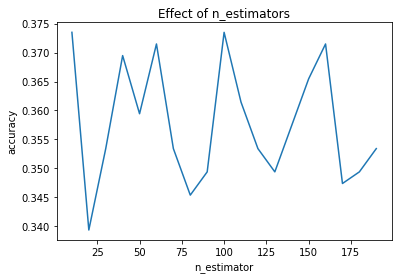

In [44]:
dataset_train = fillColumnaCategorica(dataset_sintetico, False)
dataset_train
dataset_test = fillColumnaCategorica(dataset_encuesta, False)
#Separamos la data, en variables independientes (x) y dependientes (y), para poder entrenar un árbol de clasificación
y_train = dataset_train["NObeyesdad"]
x_train = dataset_train.drop("NObeyesdad", axis=1)

#Escalamos los datos a entrenar de tal manera que lu distribución tenga un valor promedio 0 y una desviación estándar de 1
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train_scaled = sc_X.fit_transform(x_train)

y_test = dataset_test["NObeyesdad"]
x_test = dataset_test.drop("NObeyesdad", axis=1)
x_test_scaled = sc_X.fit_transform(x_test)
current_model = entrenaRandomForest(x_train, y_train, x_test, y_test)
#IMPORTANCIA BASADO EN MOSTRAR IMPORTANCIA DE CASO DE VINOS DEL CURSO
importances_rf = pd.DataFrame({"columns":x_train.columns, "importances":current_model.feature_importances_}).sort_values("importances", ascending=False)

importances_rf.style.bar()
  # #Entrenamos otro random forest 


A CONTINUACION SE USARA TODO EL DATASET Y SE DIVIDIRA EN 80-20% para su validacion con data_train y data_test respectivamente


TOP ESTIMATOR =  150
Scores:
Train      = 0.9995
Validation = 0.7787
Etiquetas a predecir: {0, 1, 2, 3, 4, 5, 6}
Etiquetas predecidas: [0 1 2 3 4 5 6]
Model Performance
Accuracy = 0.7887%.
Recall = 0.7887%.
Precision = 0.7817%.
Matrix confussion
[[62  8  1  0  0  0  0]
 [10 35  5  7  2  8  4]
 [ 0  1 48  5  3  7  7]
 [ 0  2  0 66  2  1  0]
 [ 1  0  0  0 70  0  0]
 [ 0  5  4  2  0 56  4]
 [ 0  2  7  1  2  4 55]]


,columns,importances
1,Age,0.253194
10,FAF,0.086650
6,CAEC,0.077693
4,FCVC,0.074260
11,TUE,0.067770
8,CH2O,0.064753
12,CALC,0.062587
13,MTRANS,0.058694
5,NCP,0.057466
2,family_history_with_overweight,0.054677


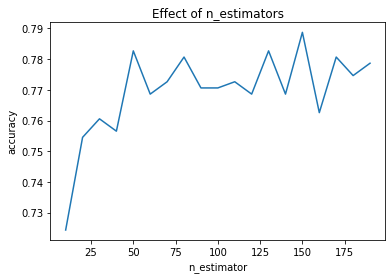

In [45]:
all_dataset = fillColumnaCategorica(dataset_completo, False)
#Separamos la data, en variables independientes (x) y dependientes (y), para poder entrenar un árbol de clasificación
y_dt = all_dataset["NObeyesdad"]
x_dt = all_dataset.drop("NObeyesdad", axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_dt, y_dt, test_size=0.2, random_state=0, stratify=y_dt)


current_model = entrenaRandomForest(x_train, y_train, x_test, y_test)
#IMPORTANCIA BASADO EN MOSTRAR IMPORTANCIA DE CASO DE VINOS DEL CURSO
importances_rf = pd.DataFrame({"columns":x_train.columns, "importances":current_model.feature_importances_}).sort_values("importances", ascending=False)

importances_rf.style.bar()
  # #Entrenamos otro random forest 


A continuacion se realizara las pruebas solo con los habitos

TOP ESTIMATOR =  150
Scores:
Train      = 0.8878
Validation = 0.6499
Etiquetas a predecir: {0, 1, 2, 3, 4, 5, 6}
Etiquetas predecidas: [0 1 2 3 4 5 6]
Model Performance
Accuracy = 0.6660%.
Recall = 0.6660%.
Precision = 0.6592%.
Matrix confussion
[[57  7  4  0  0  3  0]
 [ 9 26  7  6  4  5 14]
 [ 7  5 40  2  5  7  5]
 [ 3  2  2 53  8  1  2]
 [ 5  1  0  2 59  1  3]
 [ 1  5  5  1  2 51  6]
 [ 0  3  6  4  1 12 45]]


,columns,importances
7,FAF,0.125433
3,CAEC,0.122314
5,CH2O,0.115732
9,CALC,0.108660
8,TUE,0.107805
10,MTRANS,0.100460
1,FCVC,0.090574
2,NCP,0.086098
0,FAVC,0.066146
4,SMOKE,0.041543


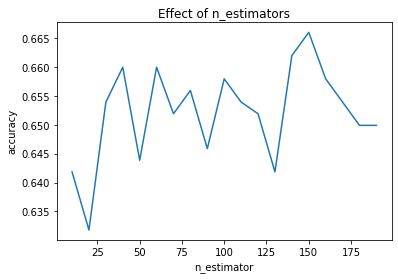

In [46]:
all_dataset = fillColumnaCategorica(dataset_completo, True)
#Separamos la data, en variables independientes (x) y dependientes (y), para poder entrenar un árbol de clasificación
y_dt = all_dataset["NObeyesdad"]
x_dt = all_dataset.drop("NObeyesdad", axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_dt, y_dt, test_size=0.2, random_state=0, stratify=y_dt)


current_model = entrenaRandomForest(x_train, y_train, x_test, y_test)
#IMPORTANCIA BASADO EN MOSTRAR IMPORTANCIA DE CASO DE VINOS DEL CURSO
importances_rf = pd.DataFrame({"columns":x_train.columns, "importances":current_model.feature_importances_}).sort_values("importances", ascending=False)

importances_rf.style.bar()
  # #Entrenamos otro random forest 

FUTURO ANALISIS
Se utilizara los modelos para predecir el nivel de obesidad de una persona a travez de los habitos que haga input, y se recomendara que valores de habitos deme mejorar para tener un nivel normal de obesisad